# SLU02 - Subsetting data in pandas: Exercise notebook

In this notebook you'll practice the concepts you've seen on the Learning and example notebooks:

    - Setting pandas Dataframe index
    - Selecting columns with brackets notation
    - Selecting columns with dot notation
    - Selecting rows with loc 
    - Selecting rows with iloc
    - Multi-axis indexing (as an alternative to Chain indexing) 
    - Masks
    - Where
    - Subsetting on conditions
    - Removing and Adding columns

**Note**: For these exercices we will be using a kaggle competition dataset containing the answers of several kaggle competitors to multiple choice questions. In each exercise, you'll be asked to implement a function, which you can check against the assertions provided.

Let's dive right in.

In [1]:
# Imports needed
import pandas as pd
import numpy as np
import math
import hashlib
from utils import draw_base_puzzle, draw_final_puzzle

from IPython.core.display import HTML

# Set max rows for pandas display
pd.options.display.max_rows = 10

# Set matplotlib figures to show inline in the notebook and to be centered by default
%matplotlib inline
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

## Kaggle Competition


As an aspiring data scientist you are eager to apply your new skills and you decide to participate in a kaggle competition. However, this competition has a twist: you must prove to have the minimum skills to enter it by completing a first data science based challenge. Easy, right?


<img src="media/kaggle_in_kaggle.png" alt="kaggle_in_kaggle" width="40%"/>


So you dive right into it. The assignment is the following: you must successfully complete a cross word puzzle where a set of hints require you to perform simple exploration tasks over a provided dataset. After completing all the words, you'll extract a secret keyphrase (marked in blue) that will unlock the competition for you.

Load the puzzle below 

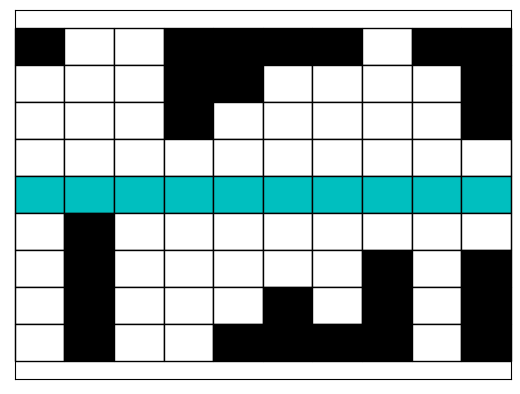

In [2]:
draw_base_puzzle()

As you can seee, it's a pretty simple one. You will be given 10 clues to fill each of the columns and extract the horizontal words in blue. 

But before that, start by loading the dataset you will be using to explore and complete the puzzle:

In [3]:
# Read kaggle multiple choice dataset with new column as index
kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')

# Show first 5 lines
kaggle_dataset.head(5)


,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,UniversityImportance,JobFunctionSelect,AlgorithmUnderstandingLevel,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,Not very important,Build prototypes to explore applying machine l...,Enough to explain the algorithm to someone non...,Always,NaN,NaN,I am not currently employed,5,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,Very important,Analyze and understand data to influence produ...,Enough to refine and innovate on the algorithm,NaN,"250,000",USD,Has increased 20% or more,10 - Highly Satisfied,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,Somewhat important,Build prototypes to explore applying machine l...,Enough to refine and innovate on the algorithm,Rarely,NaN,NaN,I do not want to share information about my sa...,2,NaN,NaN


Now let's dive into the clues! 


### Clue 1 - First value for `EmployerIndustry` when sorting the dataset by this column 

The first clue asks for the first value (using its natural order) of the column `EmployerIndustry` after we sort 
the dataframe by the same column. 

To solve this, start by implementing a function to change the index and sort it.

**Hint**: Keep in mind that we don't want to discard the original index (which automatically got the name `index`) as it may be useful in the long run.

In [4]:
def change_and_sort_index(df, column):
    """ 
    Change dataframe index to desired column and sort, avoiding 
     repeated columns
    
    Args:
        df (pd.DataFrame): the input DataFrame
        column: column name to use as index

    Returns:p
        (pd.DataFrame): resulting Dataframe

    """
    p = df.reset_index(drop=False).set_index(column).sort_index()
    return p

In [5]:
# This cell is what will test your code, please ignore it!

kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')
new_dataset = change_and_sort_index(kaggle_dataset, "CurrentJobTitleSelect")

assert isinstance(new_dataset, pd.DataFrame)
assert new_dataset.shape[0] == kaggle_dataset.shape[0]
assert new_dataset.shape[1] == kaggle_dataset.shape[1]
assert new_dataset.index.name == "CurrentJobTitleSelect"
assert new_dataset.Country[0] == "United States"
assert 'index' in list(new_dataset.columns)


You'll now use the function you built to store the first clue

In [6]:
clue_dataset = change_and_sort_index(kaggle_dataset, "EmployerIndustry")

first_sorted_employer_industry = clue_dataset.index[0]

FIRST_CLUE = first_sorted_employer_industry

### Clue 2 - Top country of origin for people with "Programmer" job title  


You now want to find the most common country (or top country as the clue puts it) for the subset of our data where
the `CurrentJobTitleSelect` equals `Programmer`. To do this, you decide to reuse your previous function to change the index and create an extra function to select rows by index values.

Implement below this second function and check it passes all the given assertions.

In [7]:
def select_rows_from_index(df, ids):
    """ 
    Select the desired rows given the index value
    
    Args:
        df (pd.DataFrame): the input DataFrame
        ids: list with the desired values to retrieve

    Returns:
        (pd.DataFrame): subset Dataframe

    """    
    df = df.loc[ids]
    return df

In [8]:
# This cell is what will test your code, please ignore it!

kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')
indexed_dataset = change_and_sort_index(kaggle_dataset, "CurrentJobTitleSelect")

desired_jobs = ['Computer Scientist', 'Programmer']
filtered_dataset = select_rows_from_index(indexed_dataset, desired_jobs)

assert isinstance(filtered_dataset, pd.DataFrame)
assert filtered_dataset.shape[0] == 797
assert filtered_dataset.shape[1] == kaggle_dataset.shape[1]

assert list(filtered_dataset.index.unique()) == desired_jobs


Combining the two you now get the second clue

In [9]:
clue_dataset = select_rows_from_index(indexed_dataset, ['Programmer'])

# When using `value_counts` the index becomes the column values and the counts are ordered from higheest to lowest
top_programmer_country = clue_dataset.Country.value_counts().index[0] 

SECOND_CLUE = top_programmer_country

### Clue 3 - The top remote work status in the examples 1000 to 1200


The next clue asks for a specific example range. For this purpose, build a function that provides indices - `start` and `end` - and retrieves the slice of rows from `start` to `end`. Implement it below


In [10]:
def get_slice(df, start, end):
    """ 
    Get a range of rows from the provided dataset 
    
    Args:
        df (pd.DataFrame): the input DataFrame
        start: start position for range
        end: end position for range

    Returns:
        (pd.DataFrame): subseted Dataframe

    """
    df = df.iloc[start:end]
    return df

In [11]:
# This cell is what will test your code, please ignore it!

kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')

top_rows_1 = get_slice(kaggle_dataset, 231, 638)

assert top_rows_1.shape[0] == 407
assert top_rows_1.shape[1] == kaggle_dataset.shape[1]
assert top_rows_1.RemoteWork.values[1] == 'Most of the time'

top_rows_2 = get_slice(kaggle_dataset, 1231, 8413)

assert top_rows_2.shape[0] == 7182
assert top_rows_2.shape[1] == kaggle_dataset.shape[1]
assert top_rows_2.RemoteWork.values[4] == 'Always'


Use the function to get the third clue:

In [12]:
clue_dataset = get_slice(kaggle_dataset, 300, 1200)

# When using `value_counts` the index becomes the column values and the counts are ordered from higheest to lowest
common_remote_work = clue_dataset.RemoteWork.value_counts().index[0] 

THIRD_CLUE = common_remote_work

### Clue 4 - The remote work status of example 4


To solve this clue, combine what you've learned above and create a function that allows you to index both the rows and the columns of a dataframe. Implement it under the function below:


In [13]:
def dedicated_subset(df, rows, columns):
    """ 
    Select columns and rows from dataframe.
    
    Args:
        df (pd.DataFrame): the input DataFrame
        rows: list of rows to fetch
        columns: list of columns to fetch

    Returns:
        (pd.DataFrame): subsetted df

    """
    df = df.loc[rows, columns]
    return df

In [14]:
# This cell is what will test your code, please ignore it!

kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')

kaggle_subset_single = dedicated_subset(kaggle_dataset, [1412], ['Country'])

assert kaggle_subset_single.shape[0] == 1
assert kaggle_subset_single.shape[1] == 1
assert kaggle_subset_single.Country.values[0] == 'Singapore'

kaggle_subset_multiple = dedicated_subset(kaggle_dataset, [11, 1111], ['RemoteWork', 'Age', 'Country'])

assert kaggle_subset_multiple.shape[0] == 2
assert kaggle_subset_multiple.shape[1] == 3
assert kaggle_subset_multiple.Age.values[1] == 36


Use the function to get the fourth clue:

In [15]:
clue_dataset = dedicated_subset(kaggle_dataset, [4], ["RemoteWork"])
clue_dataset.values[0][0]

FOURTH_CLUE = clue_dataset.values[0][0]

Now that you have found a couple of clues, let's check how the board looks. You should be able to see something shapin up.


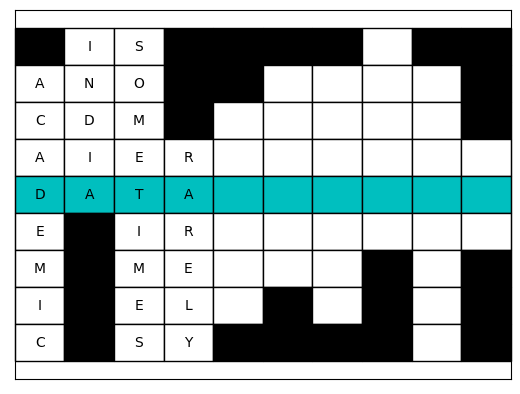

In [16]:
draw_final_puzzle([FIRST_CLUE, SECOND_CLUE, THIRD_CLUE, FOURTH_CLUE, "", "", "", "", "", ""])


Uhh exciting. Dive into the next clues to fill out the rest of the puzzle!


<img src="media/excited.gif" alt="excited" width="40%"/>



## Clues 5 - 8

These next clues ask for more complex datasets.

We will call these subset A and B. 

In particular, the clues define dataset A as follows:

* We get only coders (`CodeWriter`)
* These people are in between and including 20 and 30 years
* They are not from the United States
* They believe Univesity is important ('Very important', 'Important', 'Somewhat important')
* Work remotely with some frequence ('Sometimes', 'Most of the time', 'Always')
* Contains columns 'EmploymentStatus', 'TitleFit' and 'Country'

Implement a function that obtains this dataset.


**Hint**: Look into the function `.isin` described in the learning notebook and how it can be used to check a value against a list

**Note**: Assume the df provided into these functions will be the original dataset, and as such will have the same columns without any change

In [17]:
def kaggle_dataset_A(df):
    """ 
    Show kaggle competitors that fit the following parameters:
    
      - only coders (`CodeWriter`)
      - in between and including 20 and 30 years
      - not from the United States
      - that believe Univesity is important ('Very important', 'Important', 'Somewhat important')
      - work remotely with some frequency ('Sometimes', 'Most of the time', 'Always')
      
    Return only the employment status, title fit and country
    
    Args:
        df (pd.DataFrame): the input DataFrame

    Returns:
        (pd.DataFrame): subsetted df

    """
    df = df[(df.CodeWriter == "Yes") & (df.Age >= 20) & (df.Age <= 30) & 
            (df.Country != "United States") & 
            (df.UniversityImportance.isin(['Very important', 'Important', 'Somewhat important'])) &
           (df.RemoteWork.isin(['Sometimes', 'Most of the time', 'Always']))]
    df_select = df[['EmploymentStatus', 'TitleFit', 'Country']]
    return df_select

In [18]:
kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')
kaggle_subset_A = kaggle_dataset_A(kaggle_dataset)
kaggle_subset_A.shape

(802, 3)

In [19]:
# This cell is what will test your code, please ignore it!

kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')
kaggle_subset_A = kaggle_dataset_A(kaggle_dataset)

assert kaggle_subset_A.shape[0] == 802
assert kaggle_subset_A.shape[1] == 3
assert kaggle_subset_A.columns.tolist() == ['EmploymentStatus', 'TitleFit', 'Country']

assert kaggle_subset_A.iloc[0].TitleFit == 'Fine'
assert kaggle_subset_A.iloc[-1].TitleFit == 'Fine'


Additionally, the clues define dataset B as follows:

* not from a Financial industry (`EmployerIndustry`)
* older than 35 years
* that are from any country
* that believe University is not important (not included in 'Very important', 'Important', 'Somewhat important')
* Contains columns 'EmploymentStatus', 'TitleFit', 'CurrentJobTitleSelect' and 'Country'

Implement a function that obtains this dataset.


**Hint**: Look into the function `.isin` described in the learning notebook and how it can be used to check a value against a list

In [20]:
def kaggle_dataset_B(df):
    """ 
    Show kaggle competitors that fit the following parameters:
    
      - not from a Financial industry (`EmployerIndustry` is not `Financial`)
      - older than 35 years
      - that are from any country
      - that believe University is not important (not included in 'Very important', 'Important', 'Somewhat important')
      - CompensationCurrency
      
    Return only the employment status, title fit, current job title and country
    
    Args:
        df (pd.DataFrame): the input DataFrame

    Returns:
        (pd.DataFrame): subsetted df

    """
    df = df[(df.EmployerIndustry != "Financial") & (df.Age > 35) & 
            (~(df.UniversityImportance.isin(['Very important', 'Important', 'Somewhat important'])))]
    df_selected = df[['EmploymentStatus', 'TitleFit', 'CurrentJobTitleSelect', 'Country']]
    return df_selected

In [21]:
kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')
kaggle_subset_B = kaggle_dataset_B(kaggle_dataset)
kaggle_subset_B.shape

(2298, 4)

In [22]:
# This cell is what will test your code, please ignore it!

kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')
kaggle_subset_B = kaggle_dataset_B(kaggle_dataset)

assert kaggle_subset_B.shape[0] == 2298
assert kaggle_subset_B.shape[1] == 4
assert kaggle_subset_B.columns.tolist() == ['EmploymentStatus', 'TitleFit', 'CurrentJobTitleSelect', 'Country']

assert kaggle_subset_B.iloc[0].CurrentJobTitleSelect == 'Business Analyst'
assert kaggle_subset_B.iloc[-1].CurrentJobTitleSelect == 'Other'


Now look into the clues and retrieve the correct values to fill the puzzle:

* **Clue 5 - The country of the 14th element of subset B**
* **Clue 6 - The country of the 142th element of subset A**
* **Clue 7 - The country of the 9th element of subset B**
* **Clue 8 - The title fit of the 7th element of subset A**


In [23]:
FIFTH_CLUE = kaggle_subset_B.Country.values[31]
SIXTH_CLUE = kaggle_subset_A.Country.values[443]
SEVENTH_CLUE = kaggle_subset_B.EmploymentStatus.values[11]
EIGTH_CLUE = kaggle_subset_A.TitleFit.values[17]


## Clues 9-10

These next clues once again require that you filter your dataset into different subsets.

We will call these subset C and D. In particular:

* dataset C should not contain people with job title `Statistician`
* dataset D should contain only people with job title `Data Scientist` 

As you probably realize, you could use functions similar to the ones before to retrieve this dataset. However, we want you to use what you have learned regarding hiding data. 

Implement functions that hide the non-desired data but keep the dataframe shape.


In [24]:
def kaggle_dataset_C(df):
    """ 
    Hide all Statisticians in dataframe
    
    Args:
        df (pd.DataFrame): the input DataFrame

    Returns:
        (pd.DataFrame): output DataFrame

    """
    df = df.mask(df.CurrentJobTitleSelect == "Statistician")
    return df

In [25]:
# This cell is what will test your code, please ignore it!

kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')
kaggle_subset_C = kaggle_dataset_C(kaggle_dataset)

assert isinstance(kaggle_subset_C, pd.DataFrame)
assert kaggle_subset_C.shape[0] == kaggle_dataset.shape[0]
assert kaggle_subset_C.shape[1] == kaggle_dataset.shape[1]
assert sum(kaggle_subset_C.CurrentJobTitleSelect == 'Statistician') == 0


In [26]:
def kaggle_dataset_D(df):
    """ 
    Show only Data Scientists in dataframe
    
    Args:
        df (pd.DataFrame): the input DataFrame

    Returns:
        (pd.DataFrame): output DataFrame

    """
    df = df.where(df.CurrentJobTitleSelect == "Data Scientist")
    return df

In [27]:
# This cell is what will test your code, please ignore it!

kaggle_dataset = pd.read_csv('data/multiple_choice_2017.csv')
kaggle_subset_D = kaggle_dataset_D(kaggle_dataset)

assert isinstance(kaggle_subset_D, pd.DataFrame)
assert kaggle_subset_D.shape[0] == kaggle_dataset.shape[0]
assert kaggle_subset_D.shape[1] == kaggle_dataset.shape[1]
assert sum(kaggle_subset_D.dropna().CurrentJobTitleSelect != 'Data Scientist') == 0


Now look into the clues and retrieve the correct values to fill the puzzle:

* **Clue 9 - The first word of the employment status of the 4th element of subset D**
* **Clue 10 - The top compensation currency on subset C**


In [28]:
NINTH_CLUE = kaggle_subset_D.EmploymentStatus.values[11].split(' ')[0]
TENTH_CLUE = kaggle_subset_C.CompensationCurrency.value_counts().index[0] 


Now that you have all the clues, check the puzzle for the secret key

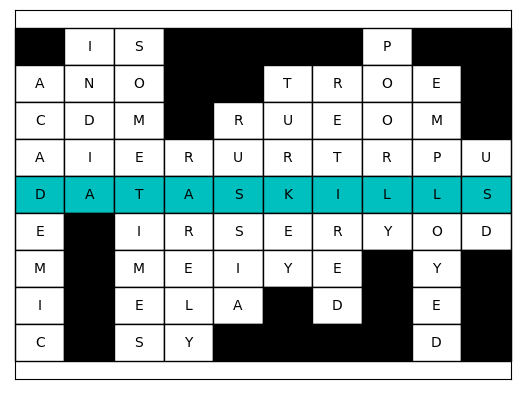

In [29]:
draw_final_puzzle(
    [
        FIRST_CLUE, 
        SECOND_CLUE, 
        THIRD_CLUE, 
        FOURTH_CLUE, 
        FIFTH_CLUE, 
        SIXTH_CLUE, 
        SEVENTH_CLUE, 
        EIGTH_CLUE, 
        NINTH_CLUE, 
        TENTH_CLUE
    ]
)

In [30]:
# Introduce the highlighted words you see, in the following form:
# kaggle_key = "highlightedword"

kaggle_key = "dataskills"

In [31]:
assert hashlib.sha256(kaggle_key.encode()).hexdigest() == "910a9c5274ba0637ca5882fdef4190e608fb05e465da46518bd7f2fe2eb6d93d"


Congratulations, you made it! You would now be able to enter the actual challenge and brag to all your friends about how good you are in data science 😄 

<img src="media/excel.jpg" alt="excel" width="40%"/>


